## Necessary imports

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import math
from matplotlib import pyplot as plt

## Load dataset

In [15]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv', usecols=lambda c: not c.startswith('Unnamed'))
print(df.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [16]:
len(df.columns)

32

## Replace M and B with 1 and 0

In [17]:
pd.options.display.max_rows = 20
df['diagnosis'] = df['diagnosis'].replace('M', 1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)

## Select features and output

In [18]:
x = df.iloc[:, 2:32]
y = df.iloc[:, 1]

## Split dataset into train and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Determine value of k

In [32]:
k = int(math.sqrt(len(y_test)))
print(f'k={k}')

k=10


In [21]:
std_sc = StandardScaler()
X_train = std_sc.fit_transform(X_train)
X_test = std_sc.transform(X_test)

## Fit model

In [22]:
classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

## Predict

In [23]:
y_pred = classifier.predict(X_test)

## Evaluate accuracy

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[77  0]
 [ 3 34]]


In [25]:
print(f1_score(y_test, y_pred))

0.9577464788732395


In [26]:
print(accuracy_score(y_test, y_pred))

0.9736842105263158


## Relationship between k and accuracy

In [33]:
accuracy = []
for k in range(1, 30):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

## Plot the relationship

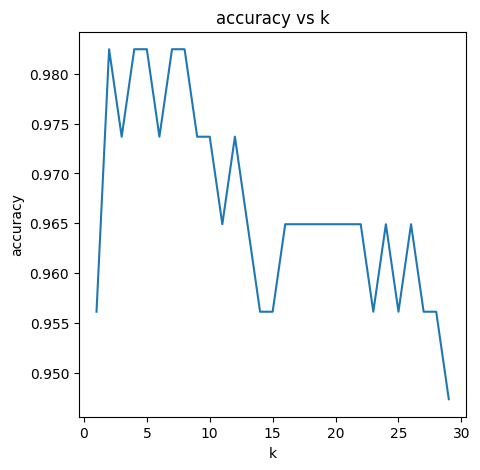

In [38]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, 30), accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy vs k')
plt.show()